In [1]:
import scipy.io as sio
import os
import numpy as np
from scipy.io import loadmat
from mayavi import mlab
import matplotlib.pyplot as plt
from mayavi import mlab
import pickle
from sklearn.preprocessing import minmax_scale
import matplotlib.colors as mcolors

In [ ]:
filename = './decoding-the-human-brain/DecMeg2014-master/additional_files/NeuroMagSensorsDeviceSpace.mat'
data = loadmat(filename, chars_as_strings=True)
position = data['pos']
orientation = data['ori']
label = data['lab']
sensor_type = data['typ']
#print(position)
print(label)


    # Normalize orientation for visualization purpose:
#orientation = orientation / np.sqrt((orientation * orientation).sum(1))[:,None]
#mlab.quiver3d(position[:,0], position[:,1], position[:,2], orientation[:,0], orientation[:,1], orientation[:,2], color=(1,0,0))
#mlab.show()

In [2]:
#fftS1=np.zeros(s1.shape)
#for i in
labloc = np.loadtxt('./decoding-the-human-brain/DecMeg2014-master/additional_files/Vectorview-all.lout', skiprows=1, usecols=(0,1,2))
print(labloc[:,0].reshape(-1,1).shape)

(306, 1)


In [37]:
FFTdata_face=[]
FFTdata_scramble=[]
FFTdata=[]
FFTY=[]
path="./decoding-the-human-brain/MEG_Train_Data"
for x in sorted(os.listdir(path)):
    data = sio.loadmat(path+'/'+x)
    #print(data['X'])
    tmp=np.power(np.abs(np.fft.fft(data['X']))[:,:,:188],2)#.reshape(-1,3,102,188)
    #tmp=np.abs(np.fft.fft(data['X']))[:,:,:188]#.reshape(-1,3,102,188)
    for i in range(tmp.shape[0]):
        tmp[i]=minmax_scale(tmp[i],axis=2)
        c=np.c_[tmp[i],labloc[:,0]]
        c=c[np.argsort(c[:, 188])]
        tmp[i]=c[:,:188]
    #FFTdata.append(tmp)
    tmp=tmp.reshape(-1,3,102,188)
    FFTdata.append(tmp)
    FFTY.append(data['y'])
    scrambleidx=np.where(data['y']==0)
    faceidx=np.where(data['y']==1)
    FFTdata_face.append(tmp[faceidx[0]])
    FFTdata_scramble.append(tmp[scrambleidx[0]])

In [4]:
data_face=[]
data_scramble=[]
rawdata=[]
path="./decoding-the-human-brain/MEG_Train_Data"
for x in sorted(os.listdir(path)):
    data = sio.loadmat(path+'/'+x)
    #print(data['X'])
    #tmp=np.power(np.abs(np.fft.fft(data['X']))[:,:,:188],2)#.reshape(-1,3,102,188)
    tmp=data['X']
    for i in range(tmp.shape[0]):
        tmp[i]=minmax_scale(tmp[i],axis=2)
        c=np.c_[tmp[i],labloc[:,0]]
        c=c[np.argsort(c[:, 375])]
        tmp[i]=c[:,:375]
    #FFTdata.append(tmp)
    tmp=tmp.reshape(-1,3,102,375)
    rawdata.append(tmp)
    scrambleidx=np.where(data['y']==0)
    faceidx=np.where(data['y']==1)
    data_face.append(tmp[faceidx[0]])
    data_scramble.append(tmp[scrambleidx[0]])

In [11]:
f=open('./decoding-the-human-brain/FFT_AllSubject_Training_Face','wb')
pickle.dump(FFTdata_face,f)

In [12]:
f=open('./decoding-the-human-brain/FFT_AllSubject_Training_scramble','wb')
pickle.dump(FFTdata_scramble,f)

In [79]:
f=open('./decoding-the-human-brain/RAW_AllSubject_Training_scramble_minmaxNorm','wb')
pickle.dump(data_scramble,f)

In [81]:
f=open('./decoding-the-human-brain/RAW_AllSubject_Training_Face_minmaxNorm','wb')
pickle.dump(data_face,f)

In [11]:
f=open('./decoding-the-human-brain/RAW_AllSubject_Training_AllClass_minmaxNorm','wb')
pickle.dump(rawdata,f)

In [13]:
f=open('./decoding-the-human-brain/FFT_AllSubject_Training_AllClass','wb')
pickle.dump(FFTdata,f)

In [6]:
f=open('./decoding-the-human-brain/FFT_AllSubject_Training_AllClass_Target','wb')
pickle.dump(FFTY,f)

In [38]:
samplingFrequency = 375
samplingInterval  = 1.5/samplingFrequency
df    = 1/1.5
fNQ = 1/samplingInterval/2
xaxis= np.arange(0,fNQ,df)
Y=None
for i in range(len(FFTY)):
    Y = np.vstack((Y,FFTY[i]))
Y=Y[1:]
F = np.zeros((1,3,102,188))
for i in range(len(FFTdata)):
    F= np.vstack((F,FFTdata[i]))

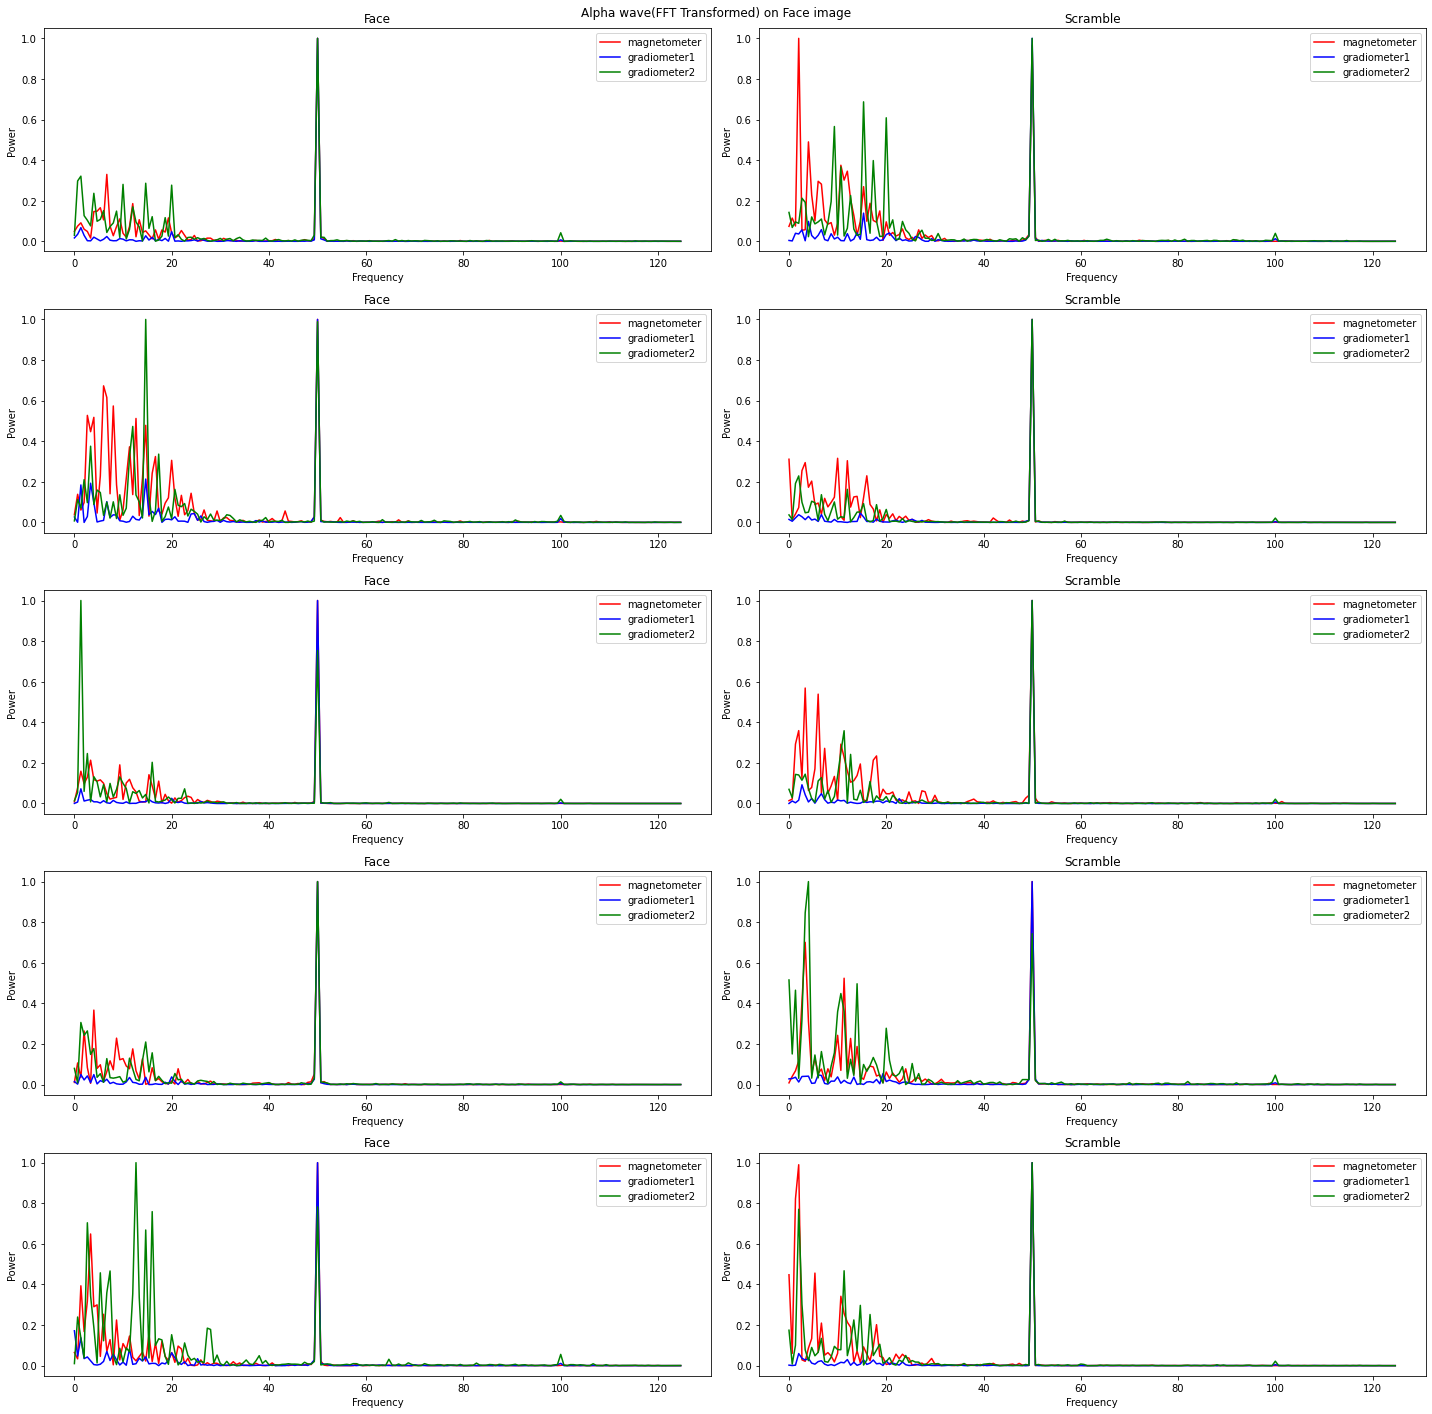

In [39]:
scrambleidx = np.where(Y==0)[0]
faceidx = np.where(Y==1)[0]
idx=np.random.choice(faceidx.shape[0],10)
fig,axes=plt.subplots(5,2,figsize=(20,20))
for c,ax in enumerate(axes.flat):
    fig.suptitle('Alpha wave(FFT Transformed) on Face image')
    index=-1
    if(c%2==0): 
        ax.set_title('Face')
        index = faceidx[c]
    else:
        ax.set_title('Scramble')
        index = scrambleidx[c]
    ax.plot(xaxis,F[index][0][0,:],color='r')
    ax.plot(xaxis,F[index][1][0,:],color='b')
    ax.plot(xaxis,F[index][2][0,:],color='g')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Power')
    ax.legend(['magnetometer','gradiometer1','gradiometer2'])
fig.tight_layout()

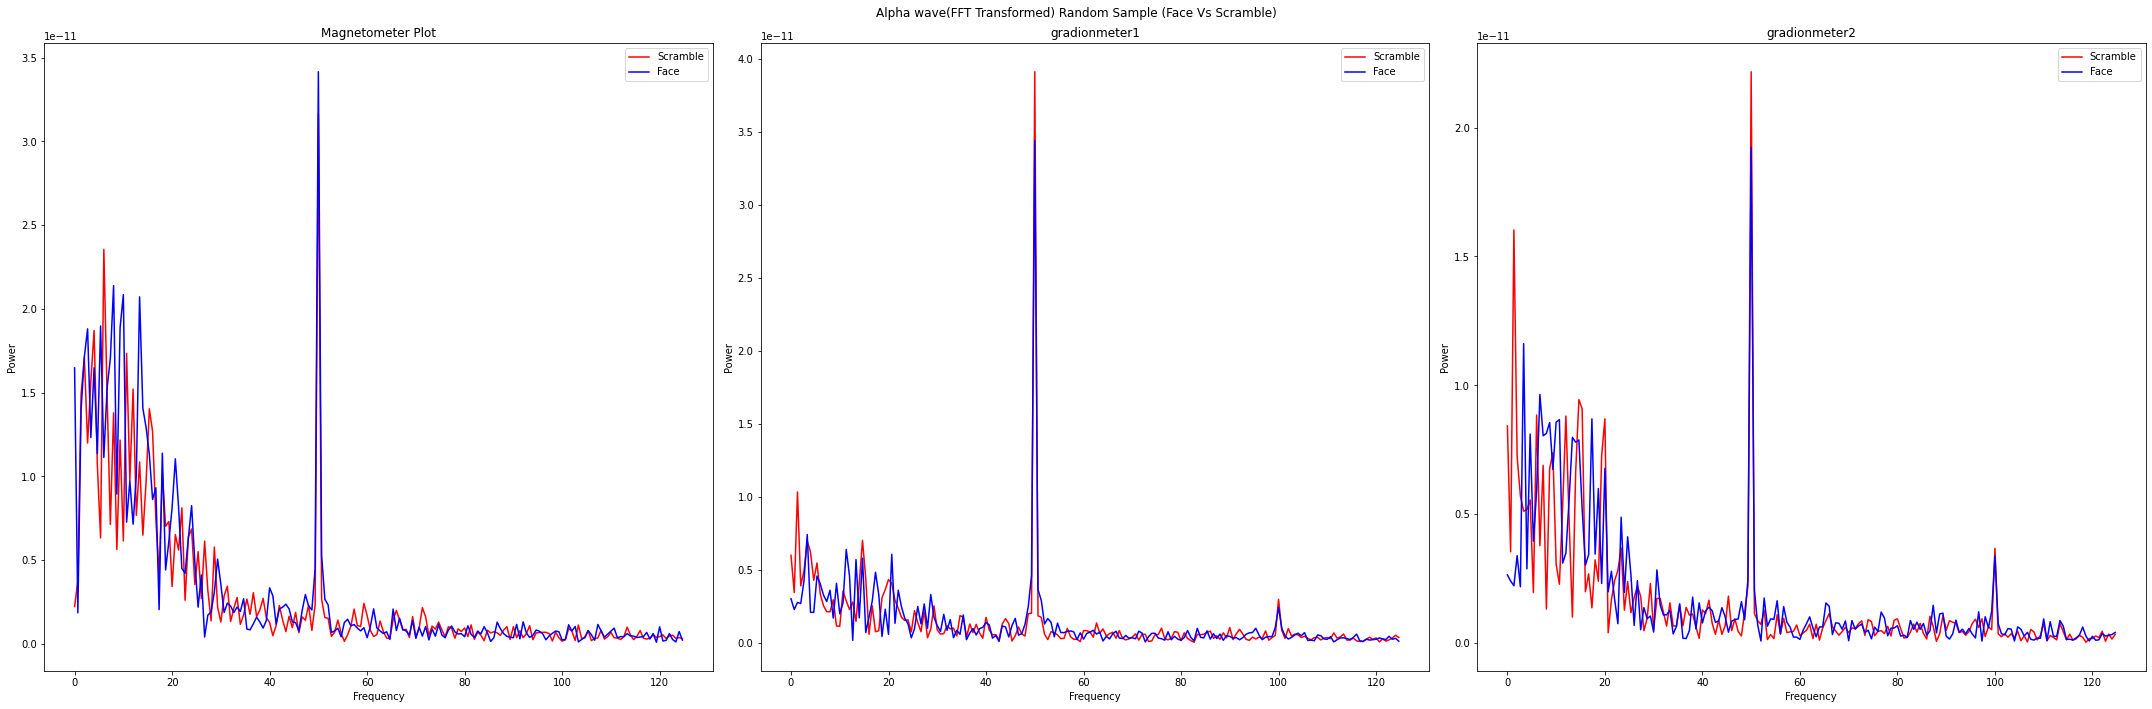

In [23]:
F=F[1:]
scrambleidx = np.where(Y==0)[0]
faceidx = np.where(Y==1)[0]
idx=np.random.choice(faceidx.shape[0],1)
fig,axes=plt.subplots(1,3,figsize=(30,10))
axlist = axes.flatten()
for i in range(idx.shape[0]):
    for j in range(3):
        if(j==0):
            t='Magnetometer Plot'
        elif(j==1):
            t='gradionmeter1'
        elif(j==2):
            t='gradionmeter2'
        sidx = scrambleidx[i]
        fidx = faceidx[i]
        axlist[i*3+j].set_title(t)
        axlist[i*3+j].plot(xaxis,F[sidx][j][0,:],color='r')
        axlist[i*3+j].plot(xaxis,F[fidx][j][0,:],color='b')
        axlist[i*3+j].set_xlabel('Frequency')
        axlist[i*3+j].set_ylabel('Power')
        axlist[i*3+j].legend(['Scramble','Face'])
fig.suptitle('Alpha wave(FFT Transformed) Random Sample (Face Vs Scramble)')
#fig.set_label('Alpha wave(FFT Transformed) Per')
fig.tight_layout()
plt.savefig('./FFTchannelPlot_random2.png')

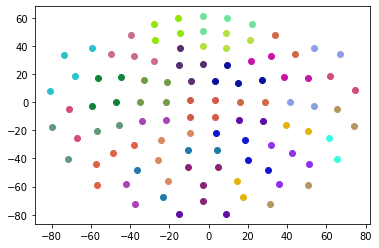

In [15]:
fig,ax=plt.subplots()
j=0
for i in range(0,labloc.shape[0],12):
    co=np.random.rand(3,)
    for g in range(4):
        x=labloc[i+(3*g):i+(3*g)+1,1]
        y=labloc[i+(3*g):i+(3*g)+1,2]
        #label=labloc[i+(3*g),0]
        ax.plot(x,y,'o',c=co)
        j+=1
        
plt.savefig('sensorLocation_102.png')

In [121]:
np.argmax(FFTdata_face[0][1][2][0,:])

75

(3, 102, 188)

TypeError: Invalid shape (3, 102, 188) for image data

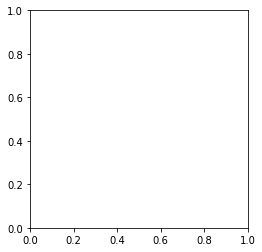

In [41]:

#scrambleidx = np.where(Y==0)[0]
#faceidx = np.where(Y==1)[0]
idx=np.random.choice(faceidx.shape[0],1)
plt.imshow(F[idx[0]])

In [27]:
1

1

In [32]:
i[1].shape

(10,)

In [19]:
i[1][1]

0

In [8]:
FFTdata[1].min()

4.5667579819680326e-32

In [5]:
#TestFFTdata_face=[]
#TestFFTdata_scramble=[]
TestFFTdata=[]
#TestFFTY=[]
path="./decoding-the-human-brain/MEG_Test_Data"
for x in sorted(os.listdir(path)):
    data = sio.loadmat(path+'/'+x)
    #print(data['X'])
    tmp=np.abs(np.fft.fft(data['X']))[:,:,:188]#.reshape(-1,3,102,188)
    for i in range(tmp.shape[0]):
        #tmp[i]=minmax_scale(tmp[i],axis=2)
        c=np.c_[tmp[i],labloc[:,0]]
        c=c[np.argsort(c[:, 188])]
        tmp[i]=c[:,:188]
    #FFTdata.append(tmp)
    tmp=tmp.reshape(-1,3,102,188)
    TestFFTdata.append(tmp)
    #TestFFTY.append(data['y'])
    #scrambleidx=np.where(data['y']==0)
    #faceidx=np.where(data['y']==1)
    #TestFFTdata_face.append(tmp[faceidx[0]])
    #FFTdata_scramble.append(tmp[scrambleidx[0]])

In [8]:
f=open('./decoding-the-human-brain/FFT_Test_minmaxNorm','wb')
pickle.dump(TestFFTdata,f)

In [26]:
data['X'][:,:,110:].shape

(594, 306, 265)

In [9]:
f=open('./decoding-the-human-brain/FFT_AllSubject_Training_AllClass','rb')
g=pickle.load(f)

UnpicklingError: invalid load key, '\x00'.

In [23]:
data['X'][:,:,110:].shape

(594, 306, 265)

In [18]:
import mne

In [21]:
fname = '../Source/decoding-the-human-brain/MEG_Train_Data/train_subject01.mat'

# load evoked data
condition = 'Left Auditory'
orginialdata =  mno.io.read_raw_fitf()
evoked = mne.read_evoked_fieldtrip(fname,info=None)
evoked_mag = evoked.copy().pick_types(meg='mag')
evoked_grad = evoked.copy().pick_types(meg='grad')

KeyError: 'data'